<a href="https://colab.research.google.com/github/cloveryo/blogImage/blob/main/Copy_of_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
print(os.path.abspath('.'))


/content


## **Using built-in keans function**

# **Draft Edition**

In [ ]:
import numpy as np

def kmeans(image, num_clusters, seed=0, max_iter=10000):
    #to generate random nb
    np.random.seed(seed)
    #2 dimension -> 1 dimension, 3 means to remain 3 channels
    img = image.reshape(-1, 3)
    img = np.float32(img)
    #print(len(img))
    #for exiting the circulation to avoid infinite circulation
    index = 0
    #3 means 3 channels. np.random.ran() genterate random nb ranged from (0, 255].
    # and use np.array() to transfer the array into float array
    clus_value = np.array(np.random.rand(num_clusters, 3)*255, dtype=float) #生成[3, 5]的二维数组，五行代表五个簇。每一列有三个像素值，代表三通道
    result = 1
    while True:
        index += 1
        flag = clus_value.copy() #copy()复制一个list
        # img和clus_value都是三列，img行数111923，numpy使用Broadcasting将clus_value[0]对每一行都起作用。
        # 所以img每个元素都和对应列的clus_value值相减求平方。将结果的img[][i]的一行所有列相加，求最小的sum对应的行索引，即最接近的簇。
        cs = np.array([np.square(img-clus_value[0]), np.square(img-clus_value[1]), np.square(img-clus_value[2])])
        # print(cs.shape)
        # print((img-clus_value[0]).shape)
        # print(img.shape)
        # print(clus_value[0].shape)
        #while(result == 1):
          # print(len(img-clus_value[0])) #三列,111923行
          # print(clus_value[0])
          #print(img-clus_value[0]) #img的每一个元素都减去了clus_value
          #result=0
        cs = np.sum(cs, axis=2) #对矩阵按列求和，即将三通道的平方差相加。矩阵大小3*n.最小的则是最接近的簇
        #print(cs)
        # print(len(clus_value))#行数
        labels = np.argmin(cs, axis=0) #argmin(数组，axis=2)返回最小cs值所在的行索引
        #print(labels)
        #print(labels.shape)
        while(result == 1):
          #print(cs.shape) #cs: n*3
          print(labels==0)
          print(img[labels==0])
          result=0
        for j in range(num_clusters):
          # for i in img:
          #   if(labels[i]==j)
            clus_value[j] = img[labels==j].mean(axis=0)
        if np.sum(np.abs(clus_value-flag)) < 1e-8 or index==max_iter:
            break
    
    segmented_image = np.array(clus_value[labels].reshape(image.shape), dtype=np.uint8)
    return segmented_image

# **Formal Edition**

In [ ]:
import numpy as np

def kmeans(image, num_clusters, max_iter=10000):
    np.random.seed()
    #2 dimension -> 1 dimension, 3 means to remain 3 channels
    img = image.reshape(-1, 3) #n*3
    np.float32(img)
    index = 0 #for exiting the circulation to avoid infinite circulation
    clus_value = np.array(np.random.rand(num_clusters, 3)*255, dtype=float) #3*3   3*5
    while True:
        index += 1
        flag = clus_value.copy()
        cs = np.array([np.square(img-clus_value[0]), np.square(img-clus_value[1]), 
                       np.square(img-clus_value[2]),np.square(img-clus_value[3]), np.square(img-clus_value[4])]) #3*n*3    clus_value[0]: 1*3
        #对矩阵按列求和，即将三通道的平方差相加。矩阵大小3*n.最小的则是最接近的簇
        cs = np.sum(cs, axis=2) #3*n    
        labels = np.argmin(cs, axis=0)
        for j in range(num_clusters):
          if len(img[labels==j]) != 0: #防止该簇不含有数据
            clus_value[j] = img[labels==j].mean(axis=0) #argmin(数组，axis=2)返回最小cs值所在的行索引
        if np.sum(np.abs(clus_value-flag)) < 1e-8 or index==max_iter:
            break
    segmented_image = np.array(clus_value[labels].reshape(image.shape), dtype=np.uint8)
    return segmented_image

In [ ]:
import cv2

img = cv2.imread("fruits.jpg")
segment_image = kmeans(img, num_clusters=5)

(111923, 3)
(5, 111923)


In [ ]:
import matplotlib.pyplot as plt

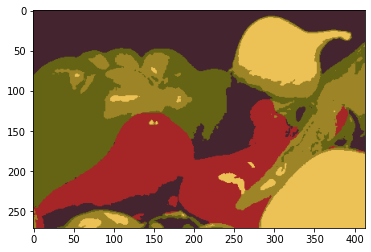

In [ ]:
segment_image = cv2.cvtColor(segment_image, cv2.COLOR_BGR2RGB)
plt.imshow(segment_image, 'gray')
plt.show()

## **Using built-in keans function**

(271, 413, 3)


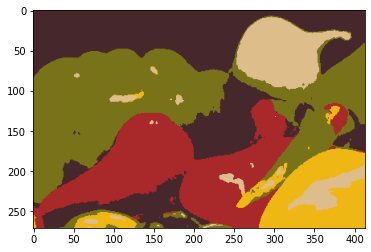

In [ ]:
# coding: utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('fruits.jpg') 
print(img.shape)

#图像二维像素转换为一维
data = img.reshape((-1,3))
data = np.float32(data)

#定义中心 (type,max_iter,epsilon)
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#设置标签
flags = cv2.KMEANS_RANDOM_CENTERS

#K-Means聚类 聚集成5类
compactness, labels5, centers5 = cv2.kmeans(data, 5, None, criteria, 10, flags)

#图像转换回uint8二维类型
centers5 = np.uint8(centers5)
res = centers5[labels5.flatten()]
dst5 = res.reshape((img.shape))

#图像转换为RGB显示
dst5 = cv2.cvtColor(dst5, cv2.COLOR_BGR2RGB)

#显示图像
images = [dst5]  
for i in range(1):  
  #  plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray'), 
  #plt.xticks([]),plt.yticks([])  
  plt.imshow(images[i], 'gray')
plt.show()